In [ ]:
#!pip install gspread oauth2client
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from __future__ import print_function
import os, sys
import pickle
import os.path
import io
import json

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as scs

from matplotlib import pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
downloaded = drive.CreateFile({'id':"1A3xjHXxEP-CEqUe7ujie8hk25XhEshLd"})   # replace the id with id of file you want to access
downloaded.GetContentFile('week2_DS.xlsx') 
data = pd.read_excel('week2_DS.xlsx')

KeyboardInterrupt: ignored

In [ ]:
data.to_pickle("./telecomm.pkl")
print(data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [135]:
#drop columns uneccesary to our analysis-->Ds(ms) is repeated
content = data.drop(columns = ['Bearer Id','Start' , 'Start ms' ,'Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)' ,'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)' ,'End' , 'End ms' , 'Last Location Name' , 'Avg RTT DL (ms)' , 'Avg RTT UL (ms)' , 'DL TP < 50 Kbps (%)' , '50 Kbps < DL TP < 250 Kbps (%)' , '250 Kbps < DL TP < 1 Mbps (%)' , 'DL TP > 1 Mbps (%)' , 'UL TP < 10 Kbps (%)' , '10 Kbps < UL TP < 50 Kbps (%)' , '50 Kbps < UL TP < 300 Kbps (%)' , 'UL TP > 300 Kbps (%)' , 'Dur. (ms).1' , 'HTTP DL (Bytes)' ,  'HTTP UL (Bytes)' ,  'Nb of sec with 125000B < Vol DL' , 'Nb of sec with 1250B < Vol UL < 6250B' , 'Nb of sec with 31250B < Vol DL < 125000B' ,'Nb of sec with 37500B < Vol UL' ,'Nb of sec with 6250B < Vol DL < 31250B' ,'Nb of sec with 6250B < Vol UL < 37500B' , 'Nb of sec with Vol DL < 6250B' , 'Nb of sec with Vol UL < 1250B'])
#rename the columns
df =content.rename(columns={'IMSI': 'subscriber_id' , 'MSISDN/Number':'Number'})
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['Netflix_volume(bytes)'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming_volume(bytes)'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other_volume(bytes)'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']
df['Youtube_volume(bytes)'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Social_media_volume(bytes)'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Google_volume(bytes)'] = df['Google UL (Bytes)'] + df['Google DL (Bytes)']
df['Email_volume'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Total_volume'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
total_duration = df['Dur. (ms)'].sum()
total_download = df['Total DL (Bytes)'].sum()
total_upload = df['Total UL (Bytes)'].sum()
df.describe(include='all')


,Dur. (ms),subscriber_id,Number,IMEI,Activity Duration DL (ms),Activity Duration UL (ms),Handset Manufacturer,Handset Type,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Netflix_volume(bytes),Gaming_volume(bytes),Other_volume(bytes),Youtube_volume(bytes),Social_media_volume(bytes),Google_volume(bytes),Email_volume,Total_volume
count,150000.00000,149431.00000,148935.00000,149429.00000,150000.00000,150000.00000,149429,149429,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150000.00000,150000.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150001.00000,150000.00000
unique,nan,nan,nan,nan,nan,nan,170,1396,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,nan,nan,nan,nan,Apple,Huawei B528S-23A,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,nan,nan,nan,nan,59565,19752,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,104608.56035,208201639651672.21875,41882819545.02736,48474547977654.16406,1829176.87183,1408879.96752,NaN,NaN,1795321.77365,32928.43438,5750752.61929,2056541.92629,1791728.86802,467373.44194,11634072.50390,11009410.13470,11626851.71874,11001754.81964,422044702.59537,8288398.11073,421100544.19449,8264799.42443,41121206.29211,454643430.07897,22628606.53838,430333100.70611,429365343.61892,22643482.63860,1828250.20803,7807294.54557,2259102.30996,495764636.37107
std,81037.62148,21488090841.36644,2447443358621.66016,22416372027957.65234,5696395.46552,4643230.59900,NaN,NaN,1035482.27595,19006.17826,3309097.01737,1189916.92600,1035839.51034,269969.30703,6710568.85019,6345423.35448,6725218.02649,6359489.75947,243967494.34638,4782699.65623,243205009.80815,4769003.68640,11276386.51469,244142874.37628,9260820.08619,244019924.02053,243268073.29161,9246800.30656,1035646.13800,3516420.23796,1071109.06062,244381801.64897
min,7142.00000,204047108489451.00000,33601001722.00000,440015202000.00000,0.00000,0.00000,NaN,NaN,12.00000,0.00000,207.00000,3.00000,14.00000,2.00000,53.00000,105.00000,42.00000,35.00000,2516.00000,59.00000,3290.00000,148.00000,2866892.00000,7114041.00000,98432.00000,306358.00000,149045.00000,78903.00000,1563.00000,40330.00000,8359.00000,28956107.00000
25%,57440.50000,208201401263249.00000,33651295581.50000,35460708865439.00000,14877.75000,21539.75000,NaN,NaN,899148.00000,16448.00000,2882393.00000,1024279.00000,892793.00000,233383.00000,5833501.00000,5517965.00000,5777156.00000,5475981.00000,210473253.00000,4128476.00000,210186872.00000,4145943.00000,33222010.50000,243106803.00000,15979455.00000,218727939.00000,218553417.00000,15998463.00000,932218.00000,4943599.00000,1359344.00000,284475924.00000
50%,86399.00000,208201546329113.00000,33663706799.00000,35722009426311.00000,39304.50000,46793.50000,NaN,NaN,1794369.00000,32920.00000,5765829.00000,2054573.00000,1793505.00000,466250.00000,11616019.00000,11013447.00000,11642217.00000,10996384.00000,423408104.00000,8291208.00000,421803006.00000,8267071.00000,41143312.00000,455841077.50000,22635545.00000,431614977.00000,429986492.00000,22661770.00000,1826471.00000,7812835.00000,2263567.00000,496861101.50000
75%,132430.25000,208201771619103.00000,33683490769.00000,86119704674953.00000,679609.50000,599095.25000,NaN,NaN,2694938.00000,49334.00000,8623552.00000,3088454.00000,2689327.00000,700440.00000,17448518.00000,16515562.00000,17470478.00000,16507268.00000,633174167.00000,12431624.00000,631691786.00000,12384148.00000,49034238.50000,665705544.00000,29290445.00000,641415878.00000,639927495.00000,292

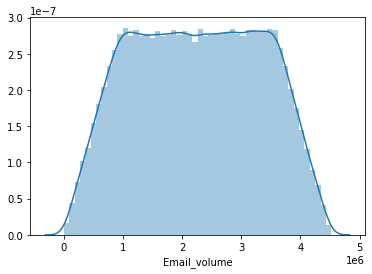

In [146]:
sns.distplot(df['Email_volume'])